In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('salaries.csv')

In [3]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
target=df['salary_more_then_100k']
inputs=df.drop('salary_more_then_100k',axis=1)

In [5]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [6]:
# coverting text tonumbers using label encoder

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [9]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_degree.fit_transform(inputs['degree'])

In [10]:
inputs1=inputs.drop(['company','job','degree'],axis=1)
inputs1

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [11]:
from sklearn import tree

In [12]:
model=tree.DecisionTreeClassifier()

In [13]:
model.fit(inputs1,target)

DecisionTreeClassifier()

In [14]:
model.score(inputs1,target)

1.0

In [15]:
model.predict([[2,2,1]])

array([0], dtype=int64)

In [16]:
model.predict([[2,0,1]])

array([1], dtype=int64)

In [17]:
len(inputs1.columns)

3

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


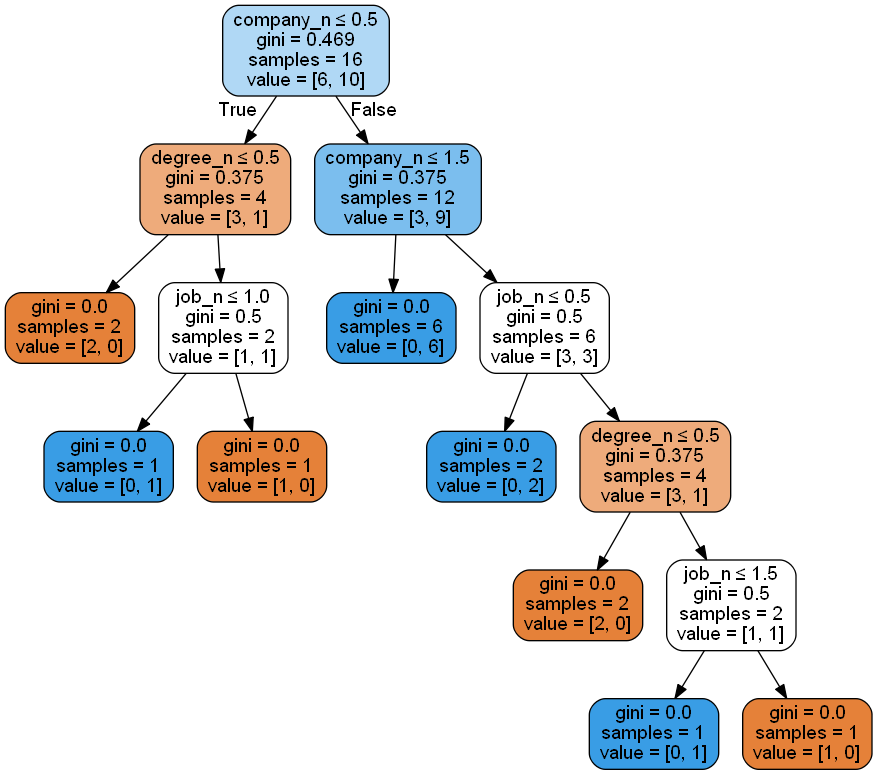

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  

from sklearn.tree import export_graphviz
import pydotplus`
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=['company_n','job_n','degree_n'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())